# Prophet demo

## Preamble

In [114]:
import pandas
import seaborn
import matplotlib
import forecast_lab
import sklearn

In [115]:
seaborn.set_style("ticks")
matplotlib.pyplot.rcParams["axes.grid"] = True
matplotlib.pyplot.rcParams["figure.figsize"] = (20, 3)

In [116]:
taxi_trips = forecast_lab.datasets.read_chicago_taxi_trips_daily()

In [117]:
taxi_trips.head()

,Trips
Date,
2013-01-01,96
2013-01-02,53
2013-01-03,61
2013-01-04,79
2013-01-05,76


Prophet expects the input time series in the format of a `pandas.DataFrame` with columns `ds` for time and `y` for values.

In [118]:
taxi_trips_p  = pandas.DataFrame(taxi_trips).reset_index()
taxi_trips_p.columns = ["ds", "y"]
superbowls = pandas.DataFrame({
  'holiday': 'superbowl',
  'ds': pandas.to_datetime([
'2013-02-03',
'2014-02-02',
'2015-02-01',
'2016-02-07',
'2017-02-05'
  ]),
  'lower_window': 0,
  'upper_window': 1,
})
## Evaluation

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 0 ==========


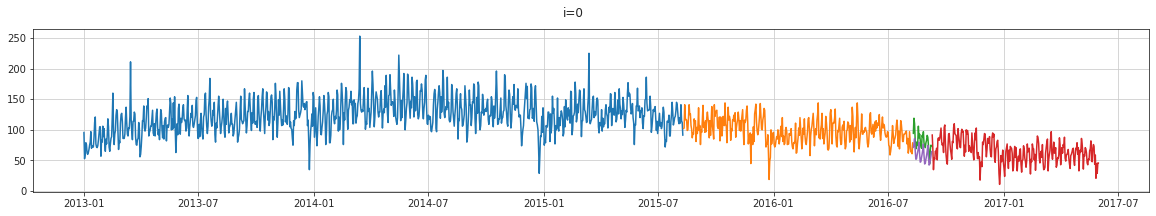

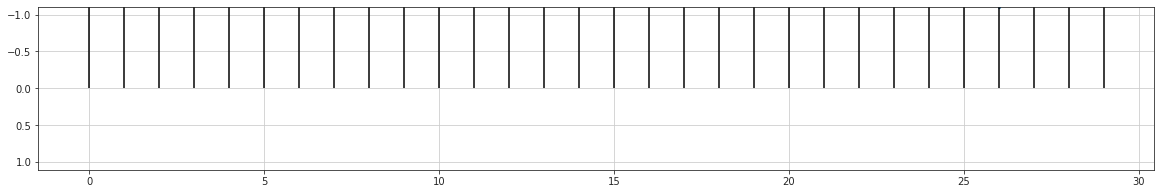

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 1 ==========


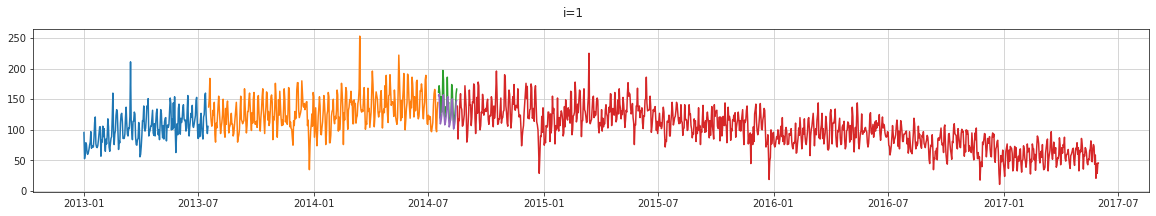

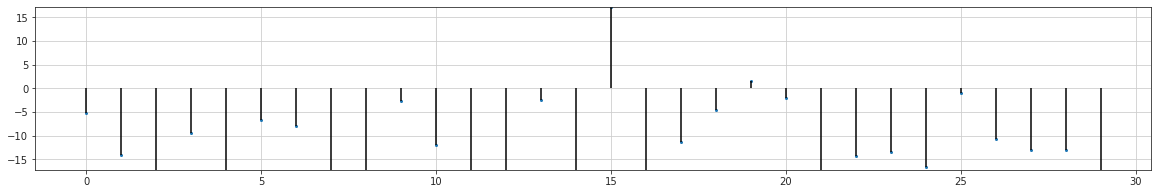

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 2 ==========


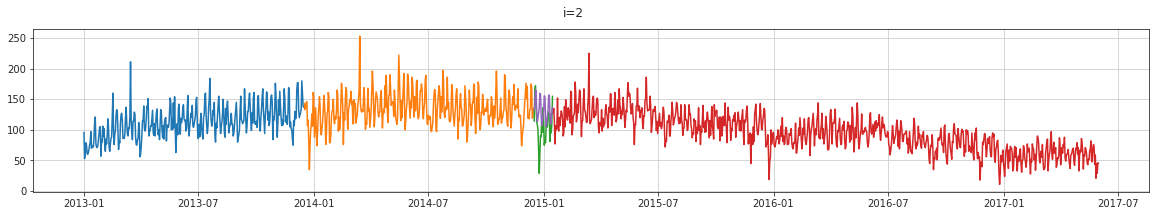

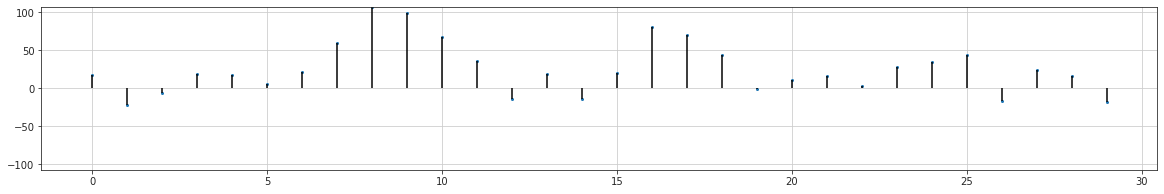

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 3 ==========


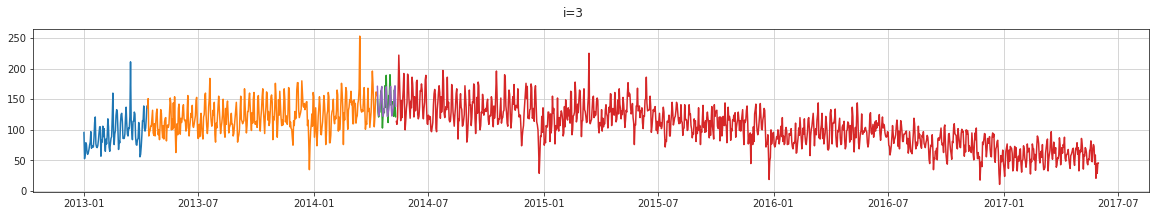

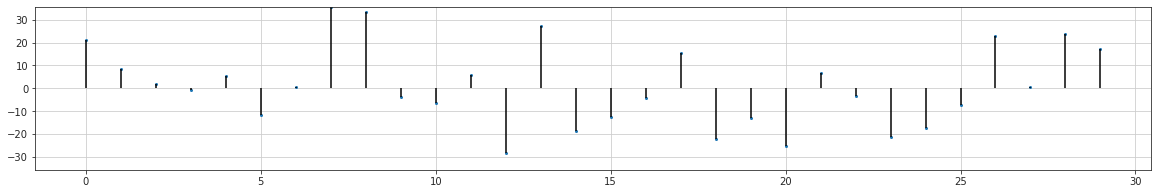

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 4 ==========


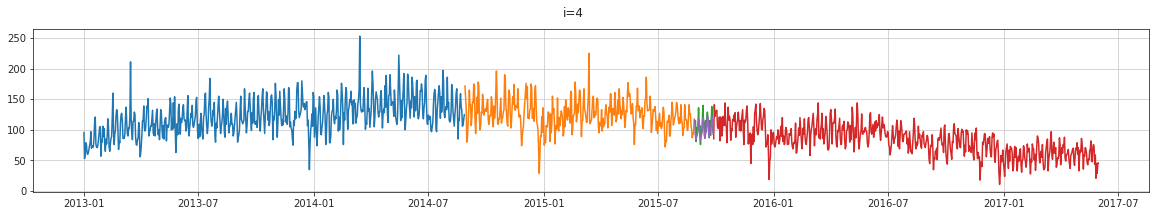

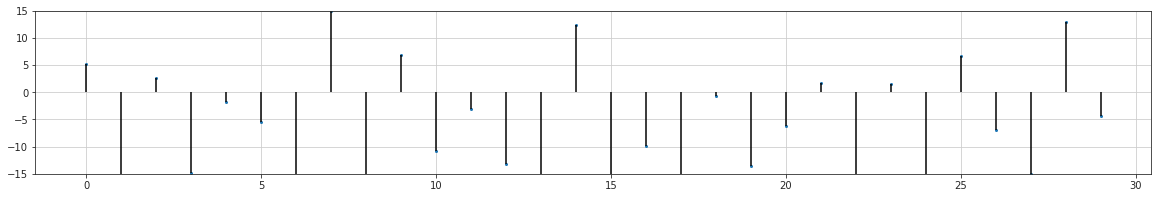

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 5 ==========


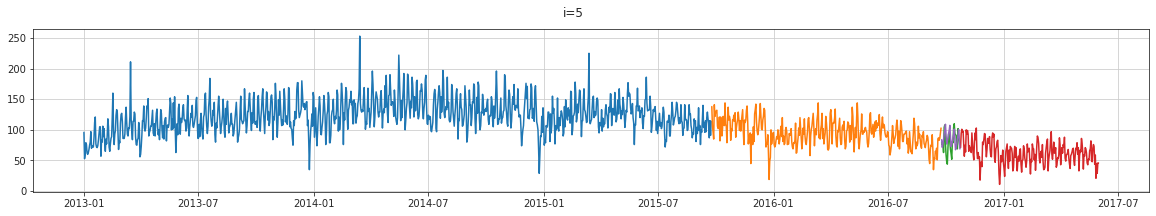

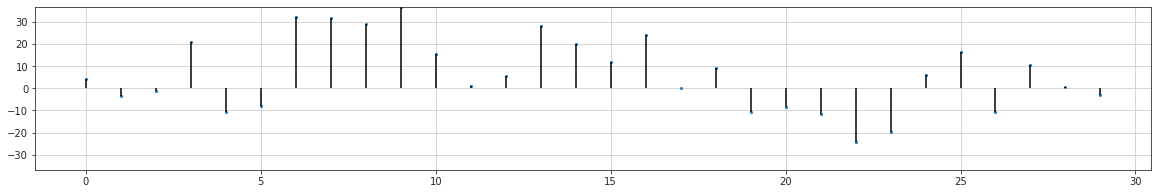

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 6 ==========


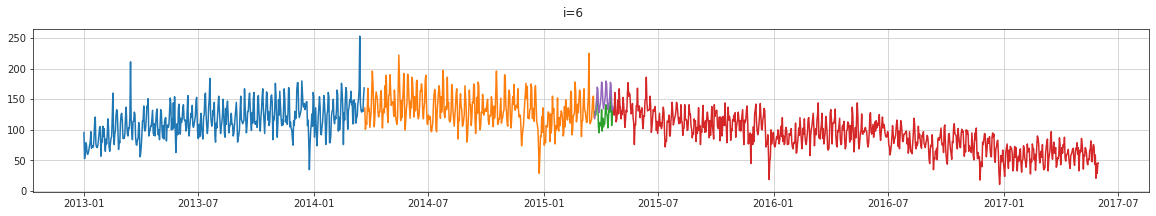

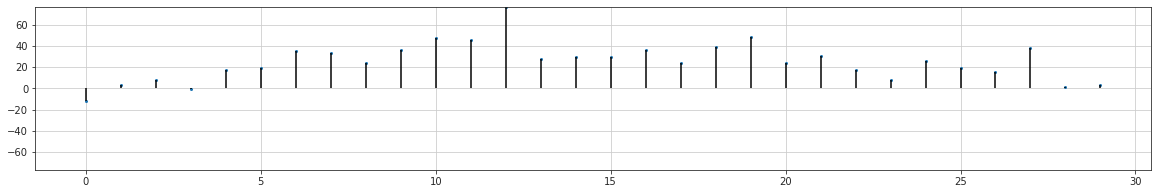

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 7 ==========


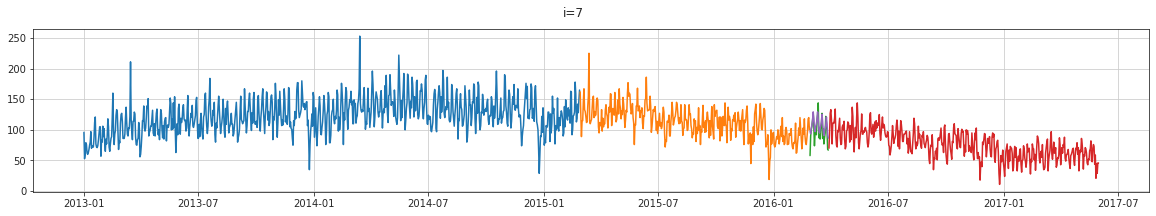

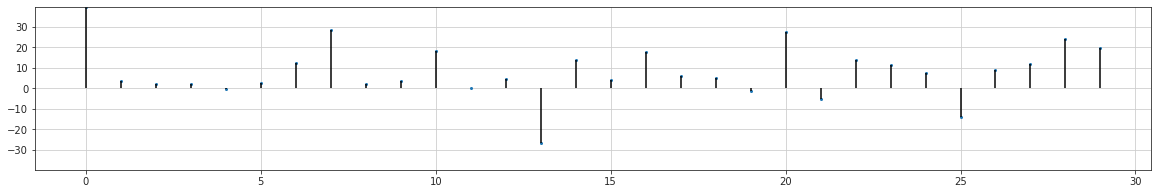

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 8 ==========


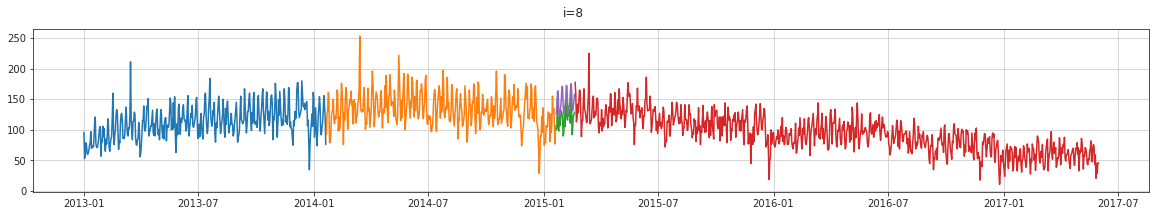

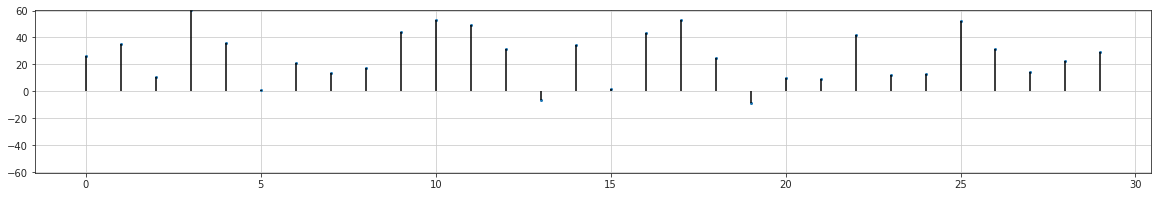

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 9 ==========


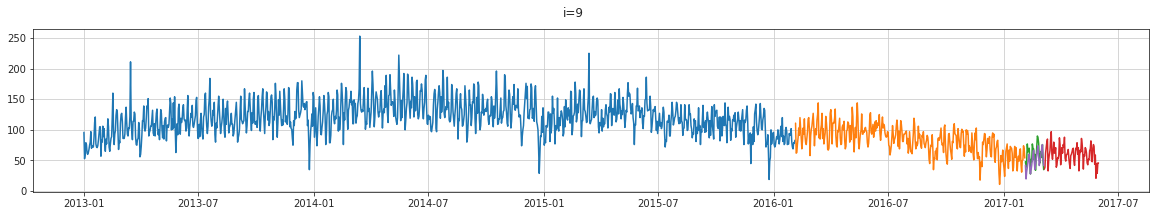

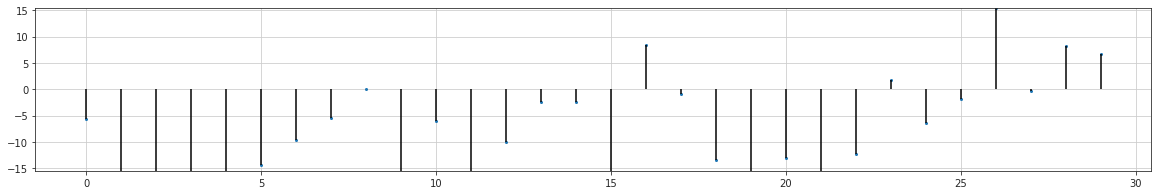

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 10 ==========


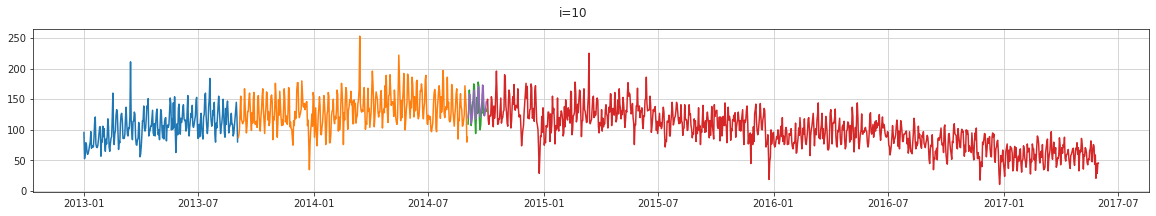

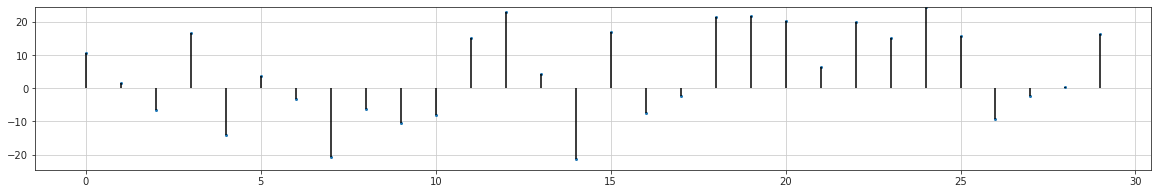

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 11 ==========


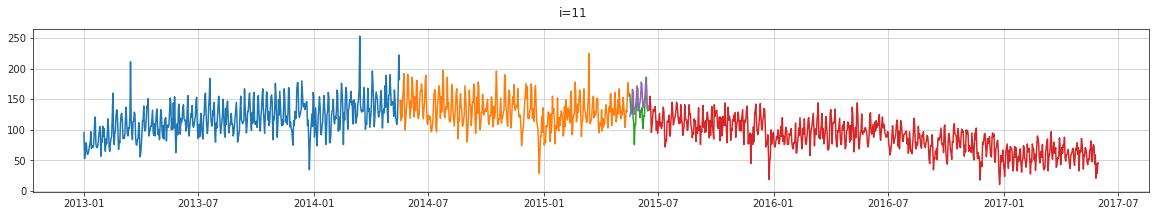

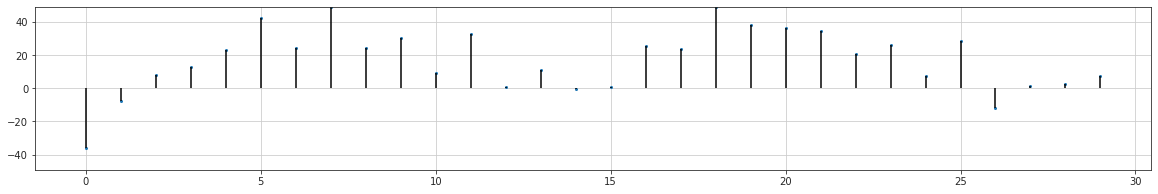

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 12 ==========


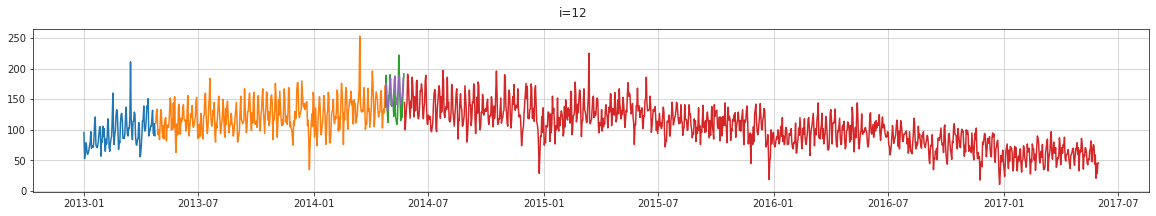

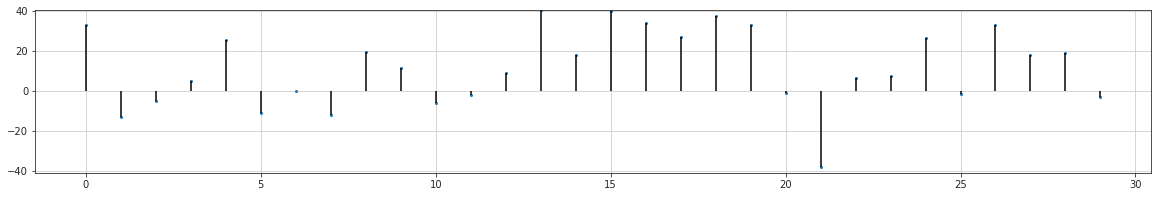

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 13 ==========


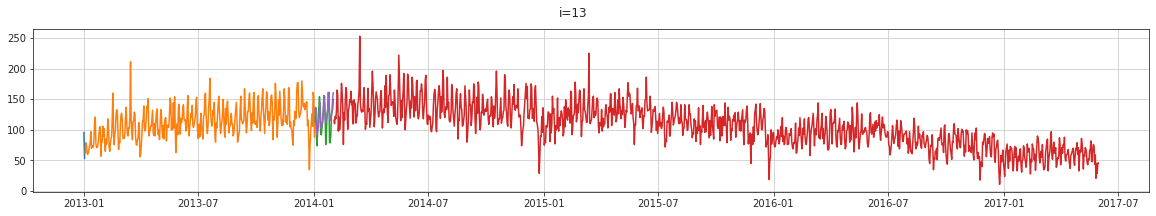

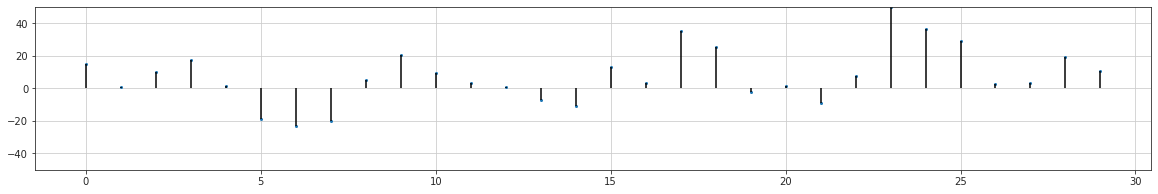

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 14 ==========


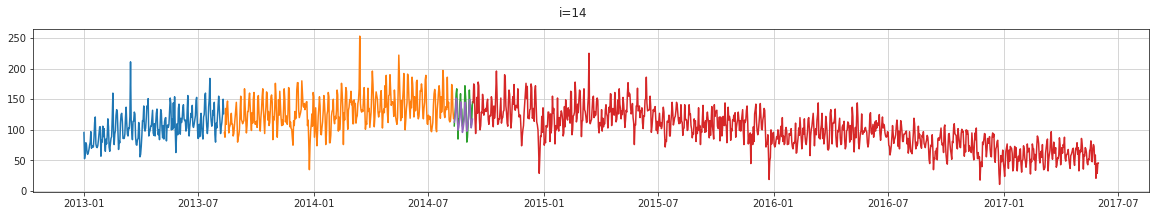

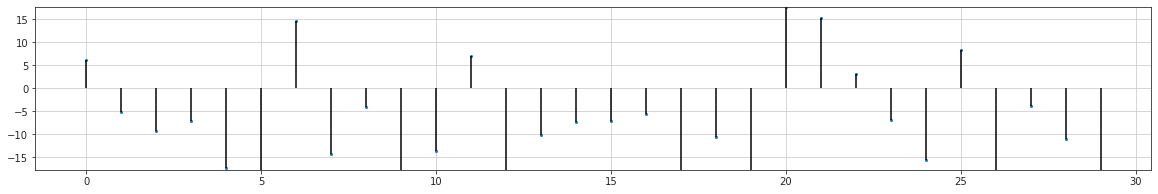

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 15 ==========


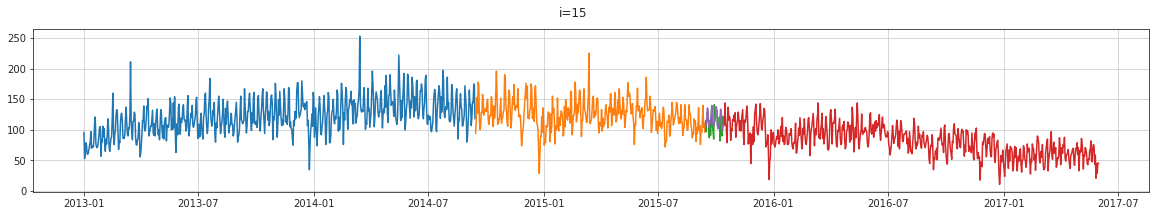

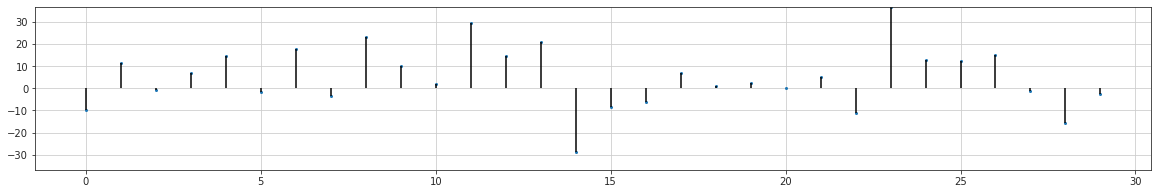

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 16 ==========


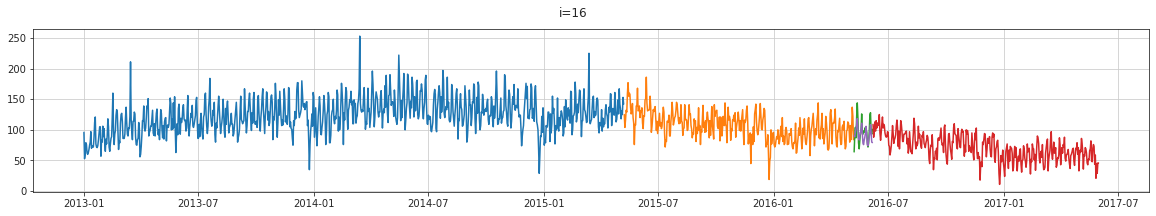

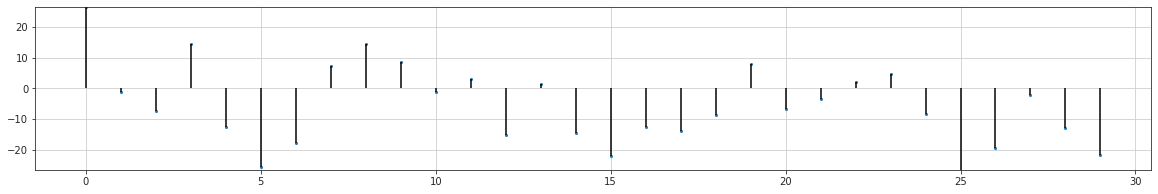

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 17 ==========


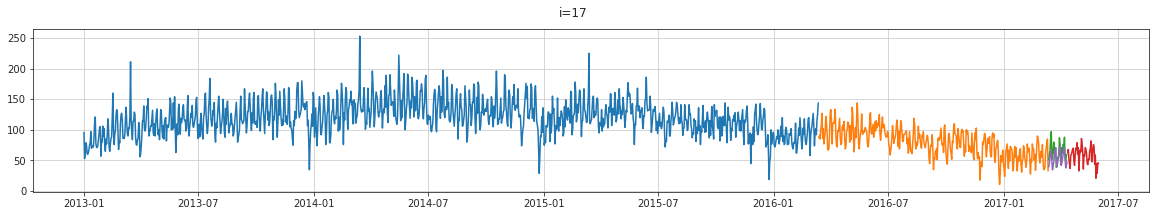

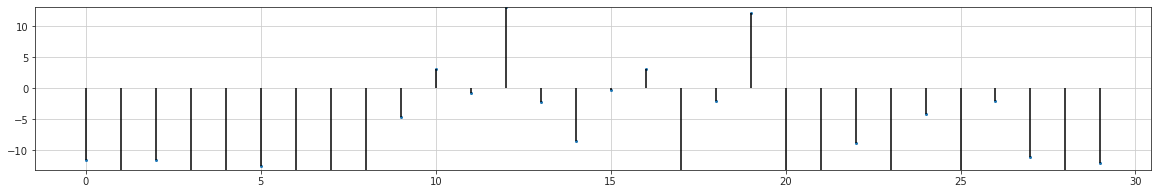

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 18 ==========


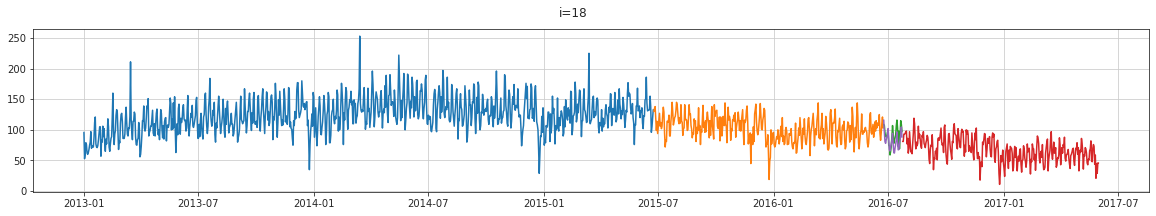

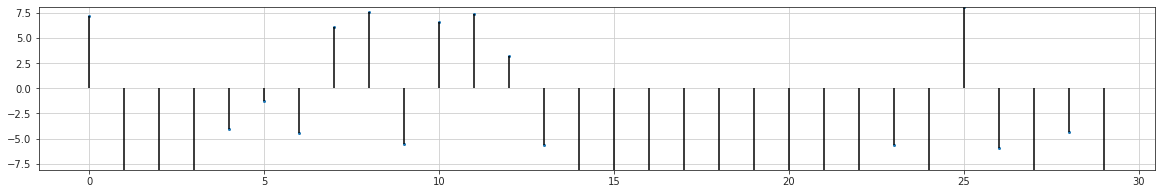

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======== iteration 19 ==========


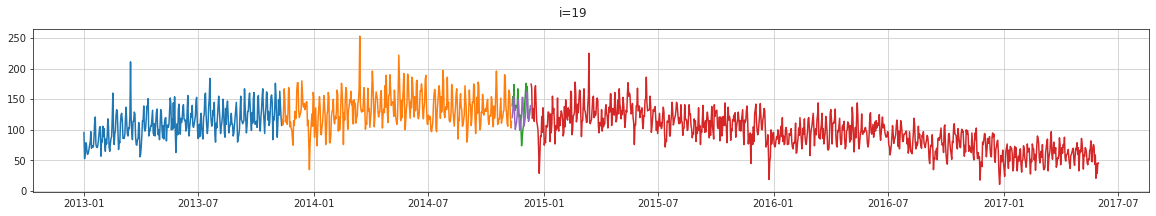

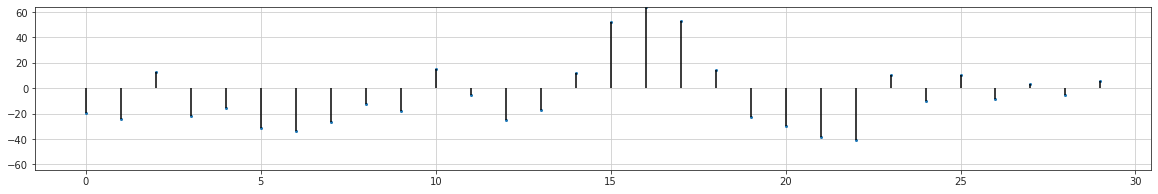

MAE    16.464627
dtype: float64

In [119]:
forecast_lab.ForecastEvaluation(
        ts=taxi_trips["Trips"],
        forecasting=forecast_lab.ProphetWrapper(
            freq="d",
            estimator_params={
                "holidays_prior_scale": 20,
                "holidays": superbowls,
                "mcmc_samples": 0,
                "yearly_seasonality": 10,
                "weekly_seasonality": True}),
        test_window_size=30,
        train_window_size=365,
        metrics={
            "MAE": sklearn.metrics.mean_absolute_error
        }
).evaluate(
    k=20,
    plot_segments=True,
    plot_residuals=True,
).get_metrics().mean()

## References
